In [8]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
# from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [9]:
# tỉ lệ 8:2
df = pd.read_csv('DXG Historical Data 1_6.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df['Price'].str.replace(',', '')
# Chuyển sang dạng số
df = pd.to_numeric(df)
df = df[::-1]

df = df.reset_index(drop=True) # Reset the index

In [10]:
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df).reshape(-1, 1))


In [11]:
# Assuming df is your DataFrame containing your data
train_size = int(0.8 * len(df))

# Split the data into training and testing sets
train_data = df1[:train_size]
test_data = df1[train_size:]



In [12]:
train_data
test_data.shape

(320, 1)

In [13]:
# !pip install tbats

In [14]:
from tbats import BATS, TBATS
# 3. Quá trình Training
y_train = np.array(train_data)

estimator = TBATS(
    seasonal_periods=[12, 30.25],
    use_arma_errors=True,
    use_box_cox=True
)
model = estimator.fit(y_train)


In [15]:
# 4. Quá trình testing
y_test = np.array(test_data)
y_pred =  model.forecast(steps=350)

In [16]:
print(y_pred[-30:])

[-1.0761348  -1.07264349 -1.05716141 -1.05140991 -1.06230414 -1.08209085
 -1.10925975 -1.13797648 -1.14643293 -1.12712706 -1.10676652 -1.1050488
 -1.10035396 -1.0717597  -1.04674112 -1.06467497 -1.11532109 -1.15564259
 -1.16873575 -1.16636575 -1.15246339 -1.12546667 -1.10152944 -1.0968252
 -1.09945048 -1.09081011 -1.07808523 -1.07560612 -1.07562386 -1.0689521 ]


In [17]:

y_next_30_days = y_pred[-30:]
y_pred = y_pred[:320]
print(y_pred)
print(y_next_30_days)

[-0.99993702 -0.99237734 -1.01049474 -1.06540166 -1.11813751 -1.1259572
 -1.10054901 -1.08135047 -1.07457359 -1.06068436 -1.04169921 -1.0370269
 -1.0461859  -1.05397359 -1.05956713 -1.06761819 -1.06726936 -1.05178159
 -1.03968362 -1.0453831  -1.05134481 -1.04147036 -1.03615998 -1.0581887
 -1.08952576 -1.10097032 -1.10017734 -1.10917057 -1.11696722 -1.09862315
 -1.06440638 -1.04834997 -1.06060605 -1.08601034 -1.11425581 -1.13863071
 -1.1433167  -1.12521702 -1.10972521 -1.11405081 -1.11752013 -1.09956599
 -1.07973258 -1.08308241 -1.09296194 -1.07980558 -1.05382462 -1.04630267
 -1.05764867 -1.06545667 -1.06748544 -1.07718874 -1.0914318  -1.09879453
 -1.10498262 -1.11743137 -1.12231484 -1.10791952 -1.09023923 -1.08489564
 -1.07868894 -1.06223433 -1.06246291 -1.10266597 -1.15487613 -1.17404339
 -1.15920427 -1.1407058  -1.12722135 -1.10718014 -1.08564389 -1.07871723
 -1.08353374 -1.08769502 -1.09371158 -1.10413229 -1.1027249  -1.08168819
 -1.06471832 -1.07048738 -1.07839355 -1.06570713 -1.05

In [18]:
train_data = df[:train_size]
test_data = df[train_size:]
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_next_30_days = scaler.inverse_transform(y_next_30_days.reshape(-1, 1))


In [19]:
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_rmse = sqrt(mean_squared_error(test_data, y_pred))

print('MAE:', test_mae)
print('RMSE:', test_rmse)
print('MAPE:', test_mape)


MAE: 6577.9585823996795
RMSE: 7251.366109697339
MAPE: 0.37439105735258627


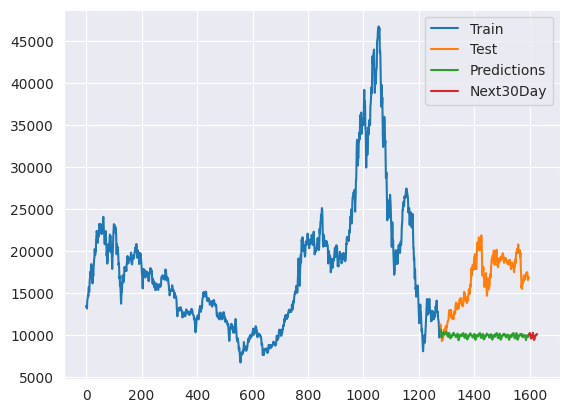

In [20]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()